In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
# plt.style.use('fivethirtyeight')

In [2]:
# Getting the stock tickers for the portfolio

assets=['TCS','HDFCBANK','ITC','RELIANCE','IRCTC']

# Assigning weights

weights=np.array([0.2,0.2,0.2,0.2,0.2])

start_date='2020-01-01'
today=datetime.today().strftime('%Y-%m-%d')
today

'2023-10-19'

In [3]:
# Dataframe to store adjusted close prices of the assets

df=pd.DataFrame()
for stock in assets:
    df[stock]=yf.download(stock+'.NS',start=start_date,end=today)['Adj Close']

df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,TCS,HDFCBANK,ITC,RELIANCE,IRCTC
Date,,,,,
2020-01-01,2013.780029,1244.189819,201.114258,1475.384155,184.826920
2020-01-02,2004.536133,1252.120361,202.592422,1500.501709,182.096664
2020-01-03,2044.485107,1234.264282,201.452103,1502.309814,182.292358
2020-01-06,2044.299194,1207.552856,198.580246,1467.467651,175.060562
2020-01-07,2049.315918,1226.674072,198.791443,1490.044067,177.595123
...,...,...,...,...,...
2023-10-12,3542.550049,1549.849976,450.700012,2349.399902,700.250000
2023-10-13,3570.850098,1535.750000,448.350006,2349.300049,704.150024
2023-10-16,3524.050049,1529.599976,448.950012,2344.050049,703.349976


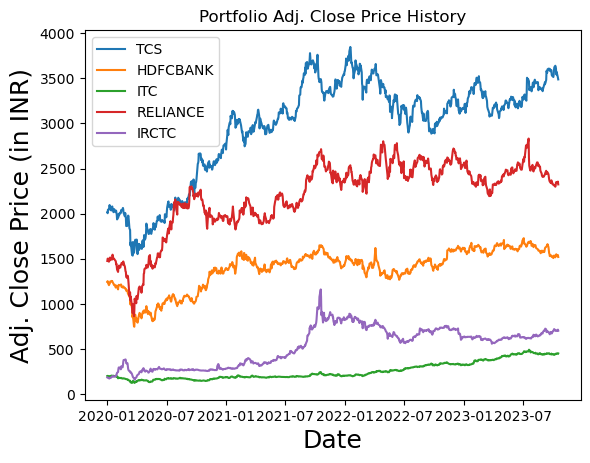

In [15]:
# Plotting the stocks

title='Portfolio Adj. Close Price History'
my_stocks=df
for col in my_stocks.columns.values:
    plt.plot(my_stocks[col],label=col)

plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Close Price (in INR)',fontsize=18)
plt.legend(my_stocks.columns.values,loc='upper left')
plt.show()

In [5]:
# Daily returns

returns=df.pct_change()
returns

,TCS,HDFCBANK,ITC,RELIANCE,IRCTC
Date,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN
2020-01-02,-0.004590,0.006374,0.007350,0.017024,-0.014772
2020-01-03,0.019929,-0.014261,-0.005629,0.001205,0.001075
2020-01-06,-0.000091,-0.021642,-0.014256,-0.023192,-0.039671
2020-01-07,0.002454,0.015835,0.001064,0.015385,0.014478
...,...,...,...,...,...
2023-10-12,-0.018657,0.006658,0.005466,0.001855,-0.006174
2023-10-13,0.007989,-0.009098,-0.005214,-0.000043,0.005569
2023-10-16,-0.013106,-0.004005,0.001338,-0.002235,-0.001136


In [6]:
# Annualized covariance matrix

cov_matrix_annual=returns.cov()*252
cov_matrix_annual

,TCS,HDFCBANK,ITC,RELIANCE,IRCTC
TCS,0.064887,0.026387,0.018181,0.032947,0.017409
HDFCBANK,0.026387,0.083538,0.025127,0.042333,0.029391
ITC,0.018181,0.025127,0.077089,0.026656,0.026546
RELIANCE,0.032947,0.042333,0.026656,0.102964,0.031988
IRCTC,0.017409,0.029391,0.026546,0.031988,0.175453


In [7]:
# Portfolio variance

port_variance=np.dot(weights.T,np.dot(cov_matrix_annual,weights))
port_variance

0.042314426288677806

In [8]:
# Calculating the portfolio volatility/standard deviation

port_volatility=np.sqrt(port_variance)
port_volatility

0.20570470653020512

In [9]:
# Calculating annual portfolio return

port_ret=np.sum(returns.mean()*weights)*252
port_ret

0.22951461380513768

In [10]:
# Expected annual return, volatility, variance


percent_var=str(round(port_variance,2)*100)+'%'
percent_volt=str(round(port_volatility,2)*100)+'%'
percent_ret=str(round(port_ret,2)*100)+'%'

print('Expected Annual Return = '+percent_ret)
print('Annual Volatility (risk) = '+percent_volt)
print('Annual Variance = '+percent_var)

Expected Annual Return = 23.0%
Annual Volatility (risk) = 21.0%
Annual Variance = 4.0%


In [12]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [13]:
# OPTIMIZATION

mu=expected_returns.mean_historical_return(df)   
S=risk_models.sample_cov(df)  # annualized sample covariance matrix

# Optimizing for max Sharpe Ratio

ef=EfficientFrontier(mu,S)
weights=ef.max_sharpe()
cleaned_weights=ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('TCS', 0.21438), ('HDFCBANK', 0.0), ('ITC', 0.39511), ('RELIANCE', 0.0), ('IRCTC', 0.39052)])
Expected annual return: 29.7%
Annual volatility: 23.7%
Sharpe Ratio: 1.17


(0.2969707662719771, 0.23655956029387387, 1.1708288852409983)

In [14]:
# Getting discrete allocation of each share per stock

from pypfopt.discrete_allocation import DiscreteAllocation,get_latest_prices

latest_prices=get_latest_prices(df)
weights=cleaned_weights
da=DiscreteAllocation(weights,latest_prices,total_portfolio_value=100000)
allocation,leftover=da.lp_portfolio()
print('Discrete Allocation: ',allocation)
print('Funds remaining: Rs. {:.2f}'.format(leftover))

Discrete Allocation:  {'TCS': 6, 'ITC': 87, 'IRCTC': 56}
Funds remaining: Rs. 367.35
